data_preprocessing

In [ ]:
# Import necessary libraries
import numpy as np # type: ignore
import pandas as pd # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
import joblib # type: ignore

In [45]:
# Load the dataset
file_path = '/content/fraudTest.csv'  # Update the path if needed
credit_card_data = pd.read_csv(file_path)

# Rename the 'Class' column to 'isFraud'
credit_card_data = credit_card_data.rename(columns={'Class': 'isFraud'})

In [46]:
# Display basic information and first few rows of the data
credit_card_data.info()
credit_card_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [47]:
# Check for missing values
credit_card_data.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [48]:
# First, check what columns are available in your DataFrame
print(credit_card_data.columns.tolist())

['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


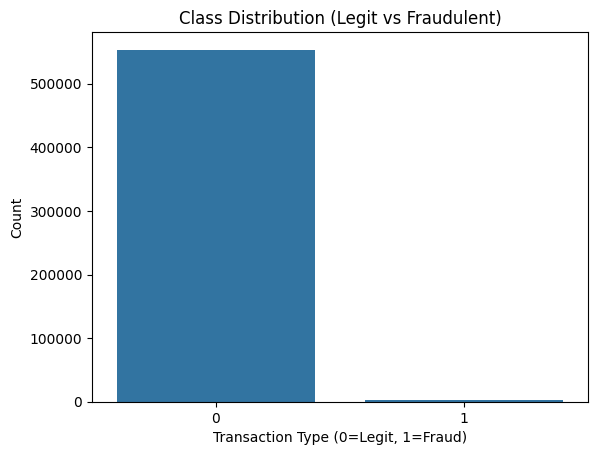

In [49]:
# Distribution of Legit and Fraudulent transactions
sns.countplot(x='is_fraud', data=credit_card_data)
plt.title('Class Distribution (Legit vs Fraudulent)')
plt.xlabel('Transaction Type (0=Legit, 1=Fraud)')
plt.ylabel('Count')
plt.show()

In [50]:
# Basic statistical description
print(credit_card_data.describe())

# Separating Legit and Fraudulent transactions
legit = credit_card_data[credit_card_data['is_fraud'] == 0]
fraud = credit_card_data[credit_card_data['is_fraud'] == 1]


          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1


Legit Transaction Amount Description:
count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

Fraud Transaction Amount Description:
count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64


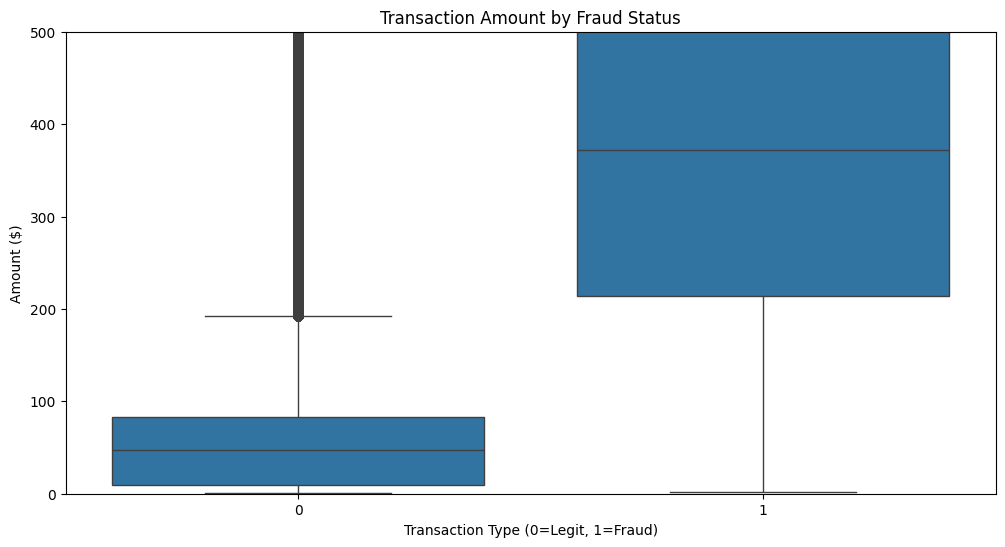

In [51]:

# Checking distribution of transaction amounts
print("\nLegit Transaction Amount Description:")
print(legit['amt'].describe())
print("\nFraud Transaction Amount Description:")
print(fraud['amt'].describe())

# Additional helpful visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_fraud', y='amt', data=credit_card_data)
plt.ylim(0, 500)  # Adjust based on your data distribution
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Transaction Type (0=Legit, 1=Fraud)')
plt.ylabel('Amount ($)')
plt.show()

In [52]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the 'amt' (transaction amount) column
credit_card_data['scaled_amt'] = scaler.fit_transform(credit_card_data['amt'].values.reshape(-1, 1))

# If you want to scale time, you might want to use 'unix_time'
# First convert 'trans_date_trans_time' to datetime if needed
credit_card_data['trans_date_trans_time'] = pd.to_datetime(credit_card_data['trans_date_trans_time'])
credit_card_data['unix_time'] = (credit_card_data['trans_date_trans_time'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [53]:
# Then scale the unix time
credit_card_data['scaled_time'] = scaler.fit_transform(credit_card_data['unix_time'].values.reshape(-1, 1))

# Check the data after scaling
print(credit_card_data[['amt', 'scaled_amt', 'unix_time', 'scaled_time']].head())

# Save preprocessed data (optional)
credit_card_data.to_csv('creditcard_preprocessed.csv', index=False)

     amt  scaled_amt   unix_time  scaled_time
0   2.86   -0.424463  1592741665    -1.703871
1  29.84   -0.252337  1592741673    -1.703869
2  41.28   -0.179353  1592741693    -1.703865
3  60.05   -0.059605  1592741715    -1.703861
4   3.19   -0.422358  1592741717    -1.703861


model_building


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Load the data
credit_card_data = pd.read_csv('/content/creditcard_preprocessed.csv')

In [62]:
# 1. Handle datetime column - convert to numerical features
credit_card_data['trans_date_trans_time'] = pd.to_datetime(credit_card_data['trans_date_trans_time'])
credit_card_data['transaction_hour'] = credit_card_data['trans_date_trans_time'].dt.hour
credit_card_data['transaction_dayofweek'] = credit_card_data['trans_date_trans_time'].dt.dayofweek
credit_card_data['transaction_month'] = credit_card_data['trans_date_trans_time'].dt.month

In [63]:
# 2. Select numerical features only (excluding strings and datetimes)
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'unix_time',
                     'merch_lat', 'merch_long', 'transaction_hour',
                     'transaction_dayofweek', 'transaction_month']

X = credit_card_data[numerical_features]
y = credit_card_data['is_fraud']


In [64]:
# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [65]:
# 4. Create a pipeline with scaling and logistic regression
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    )
)

In [66]:
# 5. Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [67]:
# 6. Model evaluation
y_pred = model.predict(X_test)

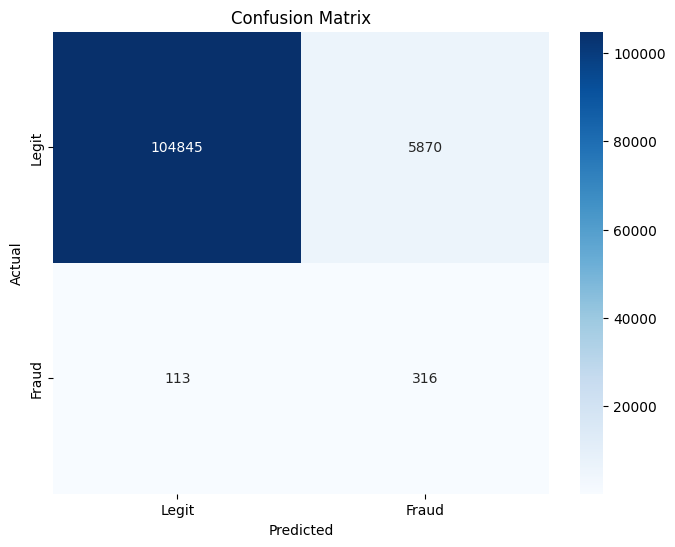

In [68]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legit', 'Fraud'],
            yticklabels=['Legit', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

              precision    recall  f1-score   support

       Legit       1.00      0.95      0.97    110715
       Fraud       0.05      0.74      0.10       429

    accuracy                           0.95    111144
   macro avg       0.53      0.84      0.53    111144
weighted avg       1.00      0.95      0.97    111144



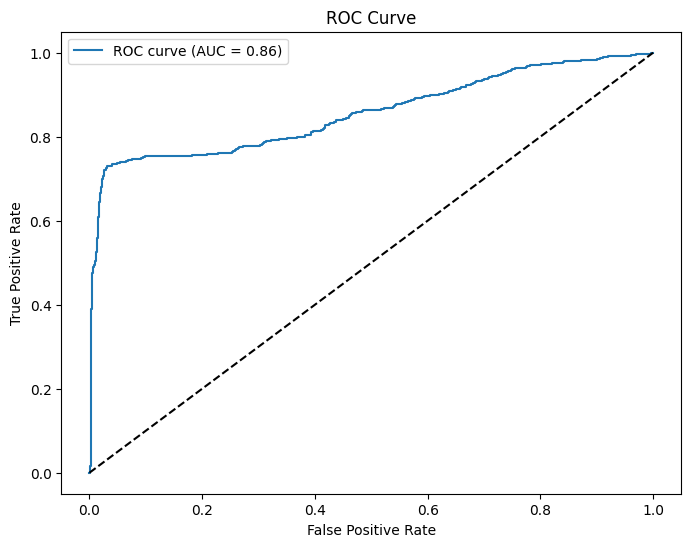

<Figure size 640x480 with 0 Axes>

In [71]:

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Legit', 'Fraud']))

# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

plt.savefig('/content/roc_curve.png')

In [70]:
# Save the model
joblib.dump(model, 'fraud_detection_model.pkl')


['fraud_detection_model.pkl']